In [1]:
import numpy as np
import diffraction as diff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time as time
from matplotlib.widgets import Button
import scipy.io
from matplotlib.widgets import RangeSlider

In [2]:
# use thetax and thetay to adjust initial orientation of the sample
thetax=np.pi/2*0
thetay=np.pi/2*1
hkl_dimension=5

# sigma_theta, if you need a small number for single crystal, input~0.01, if you need infinity, input~1000
sigma1=0.02

# sigma_phi
sigma2=0.02

# sigma_r, use this to tune the peak linewidth
sigma3=0.02

# settings for imagine plane
resolutionx=300
qxymax=5
qzmax=3

resolutionz=int(resolutionx/qxymax*qzmax)
gridx,gridz=np.meshgrid(np.linspace(-qxymax,qxymax,resolutionx),np.linspace(0,qzmax,resolutionz))

In [3]:
# read crystal structure(POSCAR file which can be converted easily from cif on VESTA)
dirr = 'D:\\research\diff2D_simulation\input\\'
filename = 'FASnI3_298K'
address = dirr + filename +'.vasp'
a1,a2,a3,positions=diff.read_poscar(address) # example (graphite)
Bpeaks = diff.Bragg_peaks(a1,a2,a3,positions,thetax,thetay,hkl_dimension)
# Bpeaks = diff.diffuse(a1,a2,a3,positions,thetax,thetay,hkl_dimension,0)
# Bpeaks.shape

In [4]:
t1_start = time.process_time()
# calculated GIWAXS pattern
III=diff.intensity(gridx,gridz,Bpeaks,sigma1,sigma2,sigma3,hkl_dimension)
t1_stop = time.process_time()
print('cpu time =')
print(t1_stop-t1_start,'s')

cpu time =
9.34375 s


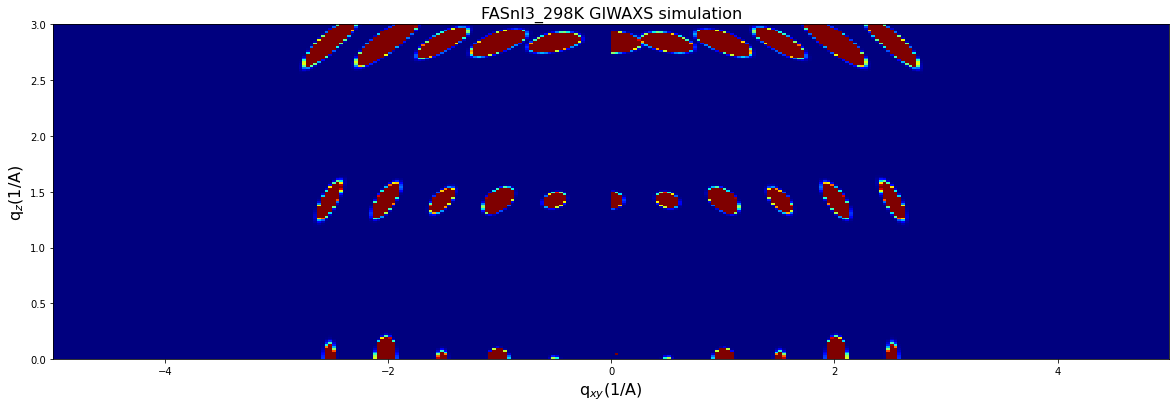

In [5]:
 # make the plot
colorbar=0.00001   # upper limit
    
II1=np.log(III+1)

II1=III
fig,ax=plt.subplots(figsize=(7,7))

ax.imshow(II1, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[-qxymax, qxymax, 0, qzmax],
               vmax=colorbar*II1.max(), vmin=II1.min())
ax.set_xlabel('q$_{xy}$(1/A)',fontsize=16)
ax.set_ylabel('q$_{z}$(1/A)',fontsize=16)
ax.set_title(filename+' GIWAXS simulation',fontsize=16)
fig.set_size_inches([20,10])
plt.savefig(dirr + filename +'_1' +'.pdf')
# scipy.io.savemat(dirr+filename+'.mat', {'a': III})

In [29]:
# compare exp data with simulation

# load GIWAXS data and input qxy qz range
%matplotlib

# dirr = ''
filename = 'exp_data'
f = scipy.io.loadmat(filename+'.mat')
Giwaxs_data=f['a']
Giwaxs_data=np.array(Giwaxs_data)
# Giwaxs_data=np.flip(Giwaxs_data)
qxymax=14
qxymin=-14
qzmax=7.8
qzmin=-2.515
yp,xp=Giwaxs_data.shape

# plot orignal GIWAXS pattern
fig,ax=plt.subplots(figsize=(7,7))

expp=ax.imshow(Giwaxs_data, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[-qxymax, qxymax, qzmin, qzmax],
               vmax=0.00000001*Giwaxs_data.max(), vmin=Giwaxs_data.min(),alpha=0.5)
fig.canvas.draw()
qxymax1=5
qxymin1=-5
qzmax1=3
qzmin1=0
simp=ax.imshow(II1, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[-qxymax1, qxymax1, qzmin1, qzmax1],
               vmax=0.00000001*Giwaxs_data.max(), vmin=Giwaxs_data.min(),alpha=0.5)
ax.set_xlabel('q$_{x}$',fontsize=16)
ax.set_ylabel('q$_{y}$',fontsize=16)
ax.set_title('C5',fontsize=16)

ax.set_xlim([min(qxymin1,qxymin),max(qxymax1,qxymax)])
ax.set_ylim([min(qzmin1,qzmin),max(qzmax1,qzmax)])


# plt.savefig('C:\\Users\z4794\Desktop\C5.pdf')


slider_ax = fig.add_axes([0.20, 0.1, 0.60, 0.03])
slider = RangeSlider(slider_ax, "Transparency", -1, 1)

def update(val):

    simp.set_alpha(val[1])
    expp.set_alpha(-val[0])
    fig.canvas.draw_idle()


slider.on_changed(update)
fig.show()

Using matplotlib backend: Qt5Agg
